In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
import sys
import os
opj = os.path.join
import numpy as np
import yaml
import pickle
from datetime import datetime, timedelta
import time

try:
    from prfpy.stimulus import PRFStimulus2D
    from prfpy.model import Iso2DGaussianModel
    from prfpy.fit import Iso2DGaussianFitter
except:
    from prfpy_csenf.stimulus import PRFStimulus2D
    from prfpy_csenf.model import Iso2DGaussianModel
    from prfpy_csenf.fit import Iso2DGaussianFitter

from dag_prf_utils.utils import *
from dag_prf_utils.prfpy_ts_plotter import TSPlotter
from scot_habrok.load_saved_info import *

In [42]:
sub = 'sub-01'
task = 'AS0'
model = 'gauss'
constr = 'constr-tc'
look_in = 'prf_no_hrf'
cut_vols = 5
ts_data = load_data_tc(
    sub=sub,
    task_list=task,
    look_in=look_in,
)[task]

prf_dataTC = load_data_prf(
    sub=sub, 
    task_list=task, 
    model_list=model,
    look_in=look_in,
    exclude='batch',
    include='constr-tc',
    )[task][model]
prf_dataBG = load_data_prf(
    sub=sub, 
    task_list=task, 
    model_list=model,
    look_in=look_in,
    exclude='batch',
    include='constr-bgfs',
    )[task][model]
prf_dataGR = load_data_prf(
    sub=sub, 
    task_list=task, 
    model_list=model,
    look_in=look_in,
    exclude='batch',
    fit_stage='grid'
    )[task][model]

prf_settings = load_yml_settings()
design_matrix = get_design_matrix_npy([task])[task]         
design_matrix = design_matrix[:,:,cut_vols:]
assert design_matrix.shape[-1]==ts_data.shape[-1]
prf_stim = PRFStimulus2D(
    screen_size_cm=prf_settings['screen_size_cm'],          # Distance of screen to eye
    screen_distance_cm=prf_settings['screen_distance_cm'],  # height of the screen (i.e., the diameter of the stimulated region)
    design_matrix=design_matrix,                            # dm (npix x npix x time_points)
    TR=prf_settings['TR'],                                  # TR
    )   
gg = Iso2DGaussianModel(
    stimulus=prf_stim,                                  # The stimulus we made earlier
    hrf=prf_settings['hrf']['pars'],                    # These are the parameters for the HRF that we normally use at Spinoza (with 7T data). (we can fit it, this will be done later...)
    normalize_RFs=prf_settings['normalize_RFs'],        # Normalize the volume of the RF (so that RFs w/ different sizes have the same volume. Generally not needed, as this can be solved using the beta values i.e.,amplitude)
    )

/scratch/p307263/pilot1/derivatives/prf_habrok/prf_no_hrf/sub-01/ses-1/sub-01_gauss_all_task-AS0-fits_COLLATED_stage-iter_constr-tc_desc-prf_params.pkl
/scratch/p307263/pilot1/derivatives/prf_habrok/prf_no_hrf/sub-01/ses-1/sub-01_gauss_all_task-AS0-fits_COLLATED_stage-iter_constr-bgfs_desc-prf_params.pkl
/scratch/p307263/pilot1/derivatives/prf_habrok/prf_no_hrf/sub-01/ses-1/sub-01_model-gauss_roi-all_task-AS0-fits_stage-grid_desc-prf_params.pkl


In [43]:
prf_objTC = TSPlotter(
    prf_params=prf_dataTC,
    model='gauss', 
    prfpy_model=gg,
    real_ts=ts_data,
)
prf_objBG = TSPlotter(
    prf_params=prf_dataBG,
    model='gauss', 
    prfpy_model=gg,
    real_ts=ts_data,
)
prf_objGR = TSPlotter(
    prf_params=prf_dataGR,
    model='gauss', 
    prfpy_model=gg,
    real_ts=ts_data,
)

prf_multi = PrfMulti(
    [prf_objBG, prf_objTC, prf_objGR], ['bg', 'tc', 'gr']
)


prf_params.shape[-1]=8
include hrf = True
include rsq = True
prf_params.shape[-1]=8
include hrf = True
include rsq = True
prf_params.shape[-1]=8
include hrf = True
include rsq = True


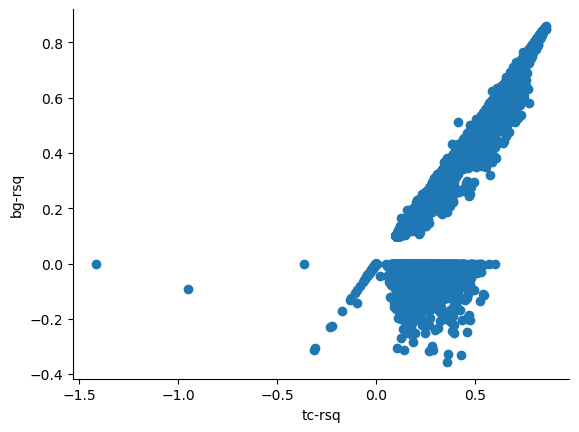

In [46]:
prf_multi.scatter('tc-rsq', 'bg-rsq', th={})

In [60]:
dag_make_custom_cmap(cmap_stack=['polar_starter', 'polar_starter_r'])
prf_multi.prf_obj['tc'].visual_field(dot_alpha=1, dot_size=1, dot_col='pol', dot_cmap='polar_starter', dot_vmin=-np.pi, dot_vmax=np.pi)

TypeError: dag_make_custom_cmap() got an unexpected keyword argument 'cmap_stack'